NeuralZoo

CIFAR-10 est un ensemble de données très utilisé comme point de référence pour la comparaison de différentes méthodes d'apprentissage automatique et pour évaluer les performances des algorithmes de classification d'images.

Il se compose d'un total de 60 000 images en couleur de taille 32x32 pixels, divisées en 10 classes distinctes, chacune contenant 6000 images.

Les classes sont les suivantes : avion, automobile, oiseau, chat, cerf, chien, grenouille, cheval, navire et camions. Le dataset est réparti en un ensemble d'entraînement de 50 000 images et un ensemble de test de 10 000 images.

Import des librairies nécessaires

In [39]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Subset
from collections import Counter
import pandas as pd
import numpy as np
from torchvision import transforms
from torchvision.datasets import CIFAR10


Transformation des images en tenseurs

Pourquoi transformer les images en tenseurs ?

Transformer les images en tenseurs permet de rendre les données compatibles avec PyTorch et de profiter de la puissance de calcul du GPU pour l'entraînement des modèles. Cela permet également de réaliser facilement des opérations mathématiques, des transformations, et de préparer les données pour les modèles d'apprentissage profond. C'est une étape essentielle dans le pipeline de traitement des données pour l'apprentissage automatique.

In [40]:
# Transformation : images en tenseurs
transform = transforms.ToTensor()

# Chargement du dataset CIFAR-10 uniquement pour l'entraînement
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Filtrer les classes animales

In [41]:
# Définir les classes animales
classes_animaux = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']
label_to_class = {i: name for i, name in enumerate(trainset.classes)}

# Filtrer les indices des animaux dans l'ensemble d'entraînement
indices_train_animaux = [i for i, (_, label) in enumerate(trainset) if label_to_class[label] in classes_animaux]

Création du sous-ensemble d'images animales

In [42]:
# Création du sous-ensemble pour les animaux
train_animaux = Subset(trainset, indices_train_animaux)

Vérification de la répartition des classes animales

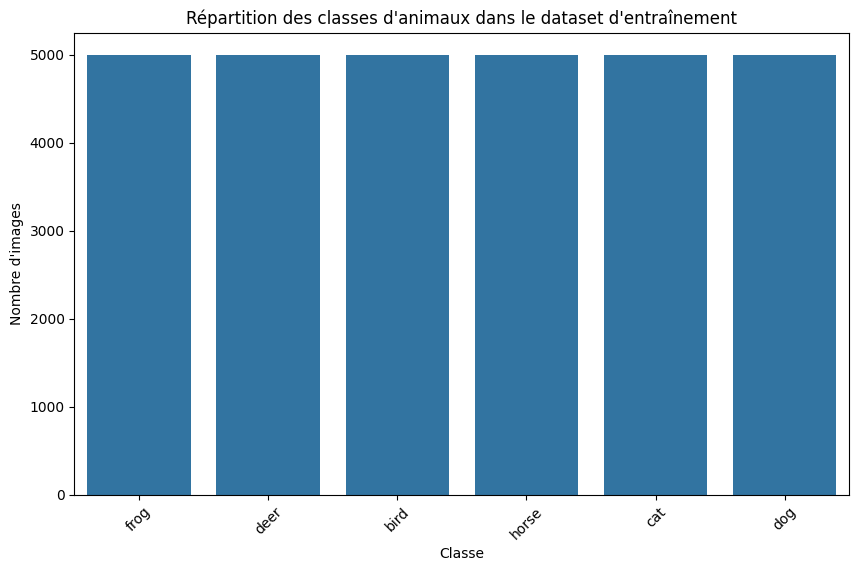

Répartition des classes dans le dataset d'entraînement animal :
       Count
frog    5000
deer    5000
bird    5000
horse   5000
cat     5000
dog     5000


In [43]:
# Vérification de la répartition des classes animales dans le sous-ensemble
labels = [label_to_class[label] for _, label in train_animaux]
class_counts = Counter(labels)

# Convertir en DataFrame pour une meilleure visualisation
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
class_counts_df = class_counts_df.sort_values(by='Count', ascending=False)

# Affichage de la répartition des classes animales
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts_df.index, y=class_counts_df['Count'])
plt.title('Répartition des classes d\'animaux dans le dataset d\'entraînement')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.show()

# Affichage de la répartition sous forme de DataFrame pour vérification
print(f"Répartition des classes dans le dataset d\'entraînement animal :\n{class_counts_df}")


Affichage d'une image de chaque classe animale

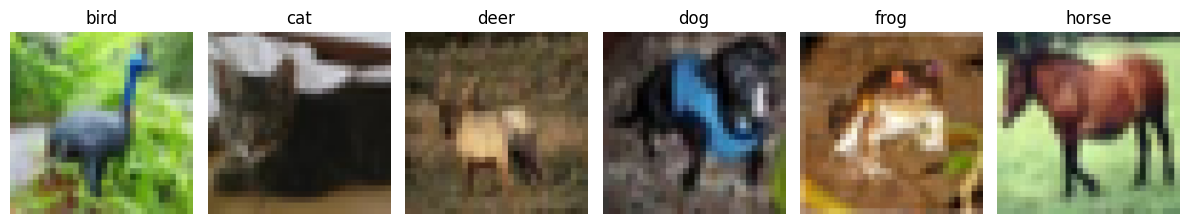

In [44]:
# Sélectionner une image de chaque classe
images_par_classe = {}
for class_name in classes_animaux:
    for idx, (img, label) in enumerate(train_animaux):
        if label_to_class[label] == class_name and class_name not in images_par_classe:
            images_par_classe[class_name] = img
            break  # Sortir dès qu'on a trouvé une image

# Affichage de quelques images par classe
plt.figure(figsize=(12, 4))
for i, class_name in enumerate(classes_animaux):
    img = images_par_classe[class_name]
    
    # Resize propre en 128x128 avec interpolation nearest (pixels nets)
    img_upscaled = transforms.functional.resize(img, size=[128, 128], interpolation=transforms.InterpolationMode.NEAREST)
    img_np = img_upscaled.numpy().transpose((1, 2, 0))  # CHW → HWC

    plt.subplot(1, len(classes_animaux), i + 1)
    plt.imshow(img_np)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

Vérification des dimensions des images et des statistiques

In [45]:
# Statistiques sur la forme des images
sample_image, _ = train_animaux[0]
print(f"Dimension d'une image : {sample_image.shape}")  # (C, H, W)

# Statistiques sur les pixels : moyenne et écart-type
all_pixels = np.concatenate([img.numpy().flatten() for img, _ in train_animaux])
mean_pixel_value = np.mean(all_pixels)
std_pixel_value = np.std(all_pixels)
print(f"Valeur moyenne des pixels : {mean_pixel_value:.4f}")
print(f"Écart-type des pixels : {std_pixel_value:.4f}")


Dimension d'une image : torch.Size([3, 32, 32])
Valeur moyenne des pixels : 0.4511
Écart-type des pixels : 0.2402
Valeur moyenne des pixels : 0.4511
Écart-type des pixels : 0.2402


Visualisation de la distribution des tailles d'images

In [46]:
# Vérification de la taille des images
image_sizes = [img.shape[1:] for img, _ in train_animaux]  # Taille des images (H, W)

# Compter les différentes tailles (bien que dans CIFAR-10, elles devraient être toutes identiques)
unique_sizes = set(image_sizes)
print(f"Taille des images : {unique_sizes}")

# Affichage d'un graphique si plusieurs tailles existent
if len(unique_sizes) > 1:
    sizes_count = {size: image_sizes.count(size) for size in unique_sizes}
    plt.bar(sizes_count.keys(), sizes_count.values())
    plt.title('Distribution des tailles des images')
    plt.xlabel('Dimensions (Hauteur, Largeur)')
    plt.ylabel('Nombre d\'images')
    plt.show()
else:
    print("Toutes les images ont la même taille.")


Taille des images : {torch.Size([32, 32])}
Toutes les images ont la même taille.


Analyse de la distribution des couleurs

In [47]:
# Calcul des statistiques des canaux de couleur (RGB) sur toutes les images
red_channel = np.concatenate([img[0].numpy().flatten() for img, _ in train_animaux])
green_channel = np.concatenate([img[1].numpy().flatten() for img, _ in train_animaux])
blue_channel = np.concatenate([img[2].numpy().flatten() for img, _ in train_animaux])

# Moyenne et écart-type des canaux RGB
mean_red = np.mean(red_channel)
std_red = np.std(red_channel)
mean_green = np.mean(green_channel)
std_green = np.std(green_channel)
mean_blue = np.mean(blue_channel)
std_blue = np.std(blue_channel)

print(f"Moyenne des canaux RGB :")
print(f"Rouge : {mean_red:.4f} | Vert : {mean_green:.4f} | Bleu : {mean_blue:.4f}")
print(f"Écart-type des canaux RGB :")
print(f"Rouge : {std_red:.4f} | Vert : {std_green:.4f} | Bleu : {std_blue:.4f}")


Moyenne des canaux RGB :
Rouge : 0.4880 | Vert : 0.4660 | Bleu : 0.3994
Écart-type des canaux RGB :
Rouge : 0.2380 | Vert : 0.2322 | Bleu : 0.2413


Détection d'images corrompues ou mal formatées

In [48]:
# Détection d'images corrompues ou mal formatées
for i, (img, label) in enumerate(train_animaux):
    try:
        img_np = img.numpy()  # Tentative de conversion en numpy array
    except Exception as e:
        print(f"Erreur avec l'image à l'index {i}: {e}")
        continue  # Passer à l'image suivante

Exploration des transformations et des augmentations de données

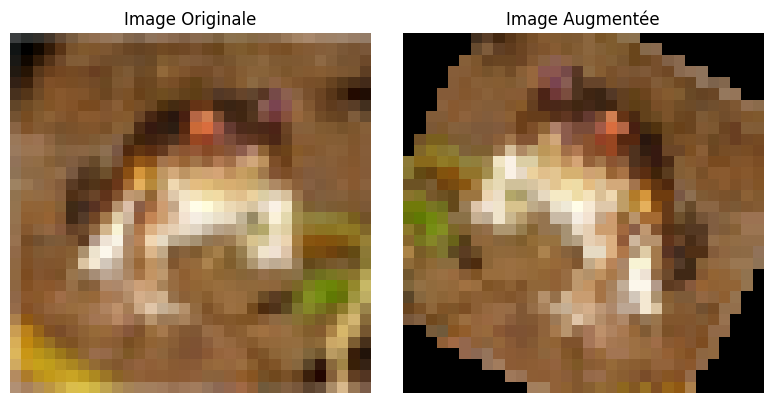

In [49]:
# Définir une transformation avec augmentation
transform_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),  # Toujours appliquer le flip pour l'exemple
    transforms.RandomRotation(30),           # Rotation aléatoire jusqu'à 30°
    transforms.ToTensor()
])

# Charger une image brute du dataset (on prend un PIL image directement)
from torchvision.datasets import CIFAR10

# Télécharger l'image sans transformation initiale
dataset_pil = CIFAR10(root='./data', train=True, download=True)
img_pil, label = dataset_pil[0]  # Image PIL originale

# Appliquer l'augmentation
img_aug = transform_augmentation(img_pil)

# Affichage
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_pil)
plt.title("Image Originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_aug.permute(1, 2, 0))  # Convertir CxHxW → HxWxC
plt.title("Image Augmentée")
plt.axis("off")

plt.tight_layout()
plt.show()



Normalisation des données (moyenne et écart type)

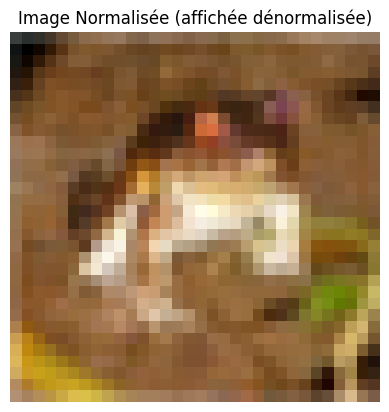

In [50]:
# Normalisation classique (ImageNet, ou calculée via CIFAR-10)
normalize = transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])

transform_norm = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

# Appliquer sur l'image PIL originale
img_tensor_norm = transform_norm(img_pil)

# Pour affichage, il faut "dénormaliser"
def denormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Dénormalisation pour affichage
img_denorm = denormalize(img_tensor_norm.clone(), [0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])

# Affichage
plt.imshow(img_denorm.permute(1, 2, 0).clip(0, 1))
plt.title("Image Normalisée (affichée dénormalisée)")
plt.axis("off")
plt.show()

Visualisation de la distribution des valeurs des pixels

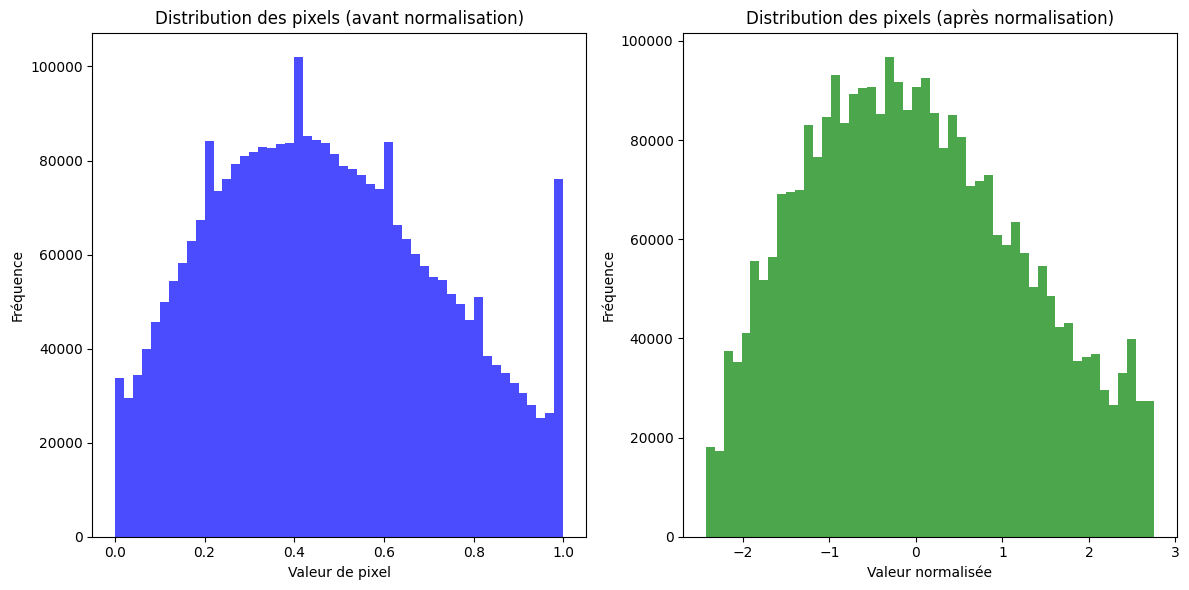

In [51]:
# Définir les transformations
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                 std=[0.2023, 0.1994, 0.2010])
transform_normalization = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

# Prendre un échantillon d’images (par exemple 1000)
nb_images = 1000
original_pixels = []
normalized_pixels = []

for i in range(nb_images):
    img_pil, _ = dataset_pil[i]  # PIL Image
    tensor_orig = to_tensor(img_pil)
    tensor_norm = transform_normalization(img_pil)
    
    original_pixels.append(tensor_orig.numpy().flatten())
    normalized_pixels.append(tensor_norm.numpy().flatten())

# Fusionner toutes les valeurs de pixels en un seul tableau
original_pixels = np.concatenate(original_pixels)
normalized_pixels = np.concatenate(normalized_pixels)

# Tracer les histogrammes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(original_pixels, bins=50, color='blue', alpha=0.7)
plt.title("Distribution des pixels (avant normalisation)")
plt.xlabel("Valeur de pixel")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
plt.hist(normalized_pixels, bins=50, color='green', alpha=0.7)
plt.title("Distribution des pixels (après normalisation)")
plt.xlabel("Valeur normalisée")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


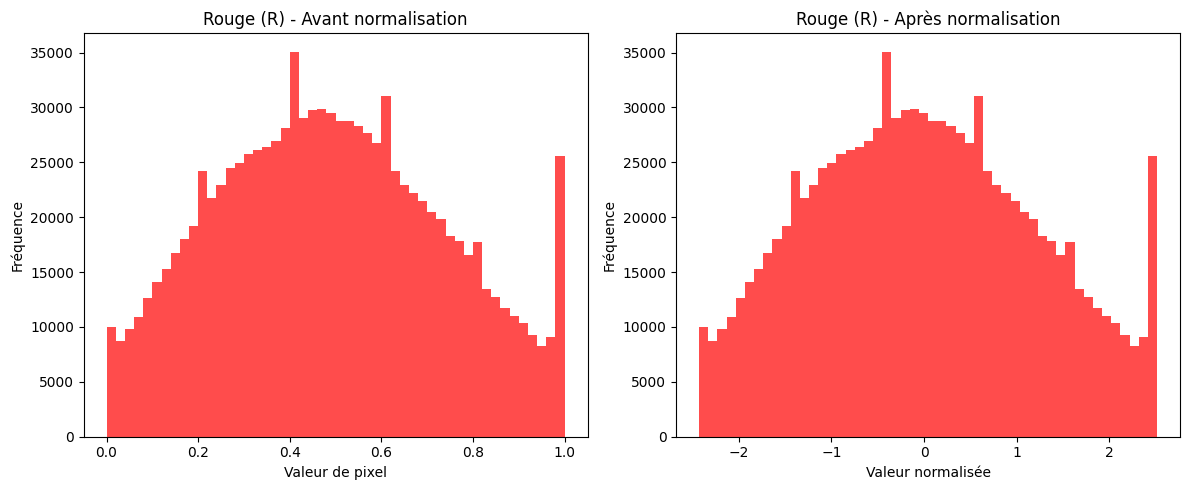

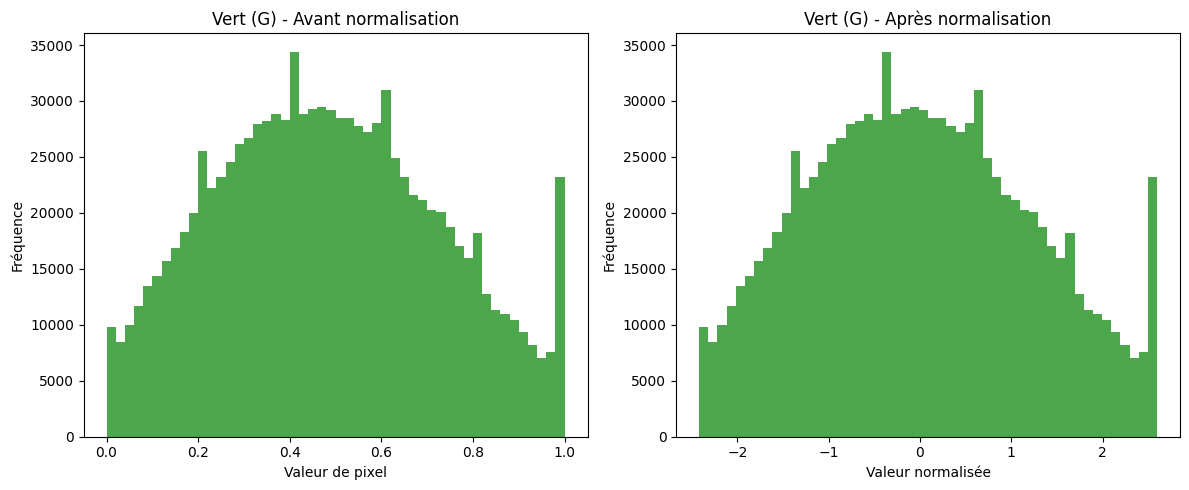

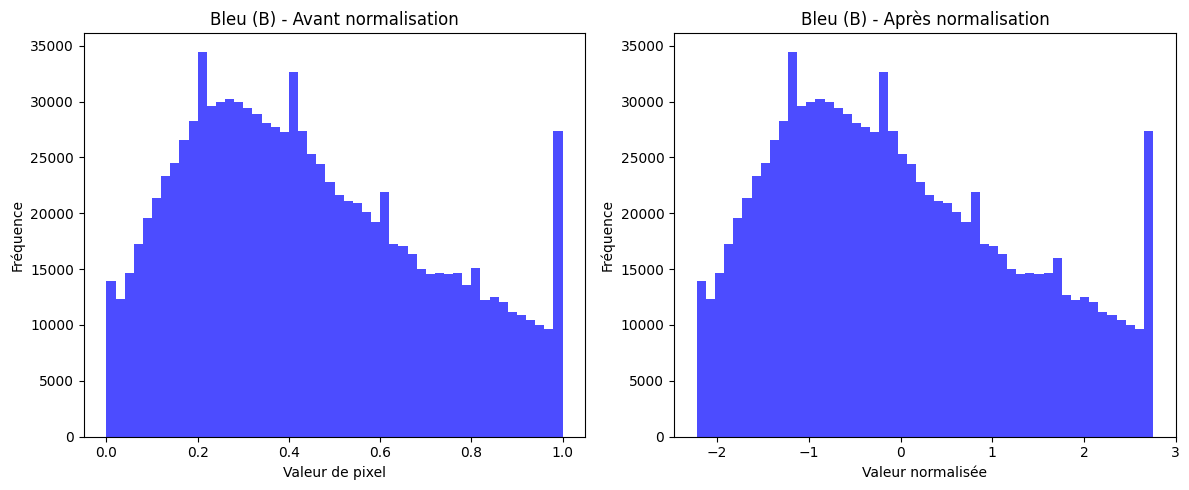

In [52]:
# Définir les transformations
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                 std=[0.2023, 0.1994, 0.2010])
transform_normalization = transforms.Compose([transforms.ToTensor(), normalize])

# Initialiser les listes
nb_images = 1000
original_pixels = []
normalized_pixels = []

pixels_r, pixels_g, pixels_b = [], [], []
pixels_r_norm, pixels_g_norm, pixels_b_norm = [], [], [],

# Boucle : extraction des pixels
for i in range(nb_images):
    img_pil, _ = dataset_pil[i]

    # AVANT normalisation
    tensor = to_tensor(img_pil)  # dans [0, 1]
    original_pixels.append(tensor.numpy().flatten())

    # APRÈS normalisation
    tensor_norm = transform_normalization(img_pil)
    normalized_pixels.append(tensor_norm.numpy().flatten())

    # Séparation par canal
    pixels_r.append(tensor[0].flatten().numpy())
    pixels_g.append(tensor[1].flatten().numpy())
    pixels_b.append(tensor[2].flatten().numpy())

    pixels_r_norm.append(tensor_norm[0].flatten().numpy())
    pixels_g_norm.append(tensor_norm[1].flatten().numpy())
    pixels_b_norm.append(tensor_norm[2].flatten().numpy())

# Fusion des pixels
original_pixels = np.concatenate(original_pixels)
normalized_pixels = np.concatenate(normalized_pixels)

pixels_r = np.concatenate(pixels_r)
pixels_g = np.concatenate(pixels_g)
pixels_b = np.concatenate(pixels_b)

pixels_r_norm = np.concatenate(pixels_r_norm)
pixels_g_norm = np.concatenate(pixels_g_norm)
pixels_b_norm = np.concatenate(pixels_b_norm)

# Fonction pour les canaux séparés
def plot_channel_hist(before, after, channel_name, color):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(before, bins=50, color=color, alpha=0.7)
    plt.title(f"{channel_name} - Avant normalisation")
    plt.xlabel("Valeur de pixel")
    plt.ylabel("Fréquence")

    plt.subplot(1, 2, 2)
    plt.hist(after, bins=50, color=color, alpha=0.7)
    plt.title(f"{channel_name} - Après normalisation")
    plt.xlabel("Valeur normalisée")
    plt.ylabel("Fréquence")

    plt.tight_layout()
    plt.show()

# Visualisation par canal
plot_channel_hist(pixels_r, pixels_r_norm, "Rouge (R)", "red")
plot_channel_hist(pixels_g, pixels_g_norm, "Vert (G)", "green")
plot_channel_hist(pixels_b, pixels_b_norm, "Bleu (B)", "blue")

Conclusion :

- Uniformité des tailles des images : Les images sont toutes de 32x32 pixels, ce qui est cohérent avec le dataset CIFAR-10.

- Distribution des couleurs : Les moyennes et écarts-types des canaux RGB peuvent être utiles pour observer des anomalies de couleur ou des variations dans les images.

- Diversité des images : Une grande variété d'images peut exister dans chaque classe, il est donc crucial de considérer des augmentations de données pour améliorer la performance des modèles.

- Normalisation : Il est essentiel de normaliser les images avant de les passer dans un modèle, ce qui améliore la convergence de l'entraînement.

In [53]:
# Résumé complet par canal

# AVANT normalisation
stats_before = {
    "Rouge": (pixels_r, "🔴"),
    "Vert":  (pixels_g, "🟢"),
    "Bleu":  (pixels_b, "🔵"),
}

# APRÈS normalisation
stats_after = {
    "Rouge": (pixels_r_norm, "🔴"),
    "Vert":  (pixels_g_norm, "🟢"),
    "Bleu":  (pixels_b_norm, "🔵"),
}

# Affichage comparatif
print(f"📊 RÉSUMÉ COMPLET PAR CANAL (sur {nb_images} images)\n")

for canal in stats_before:
    data_before = stats_before[canal][0]
    data_after = stats_after[canal][0]
    emoji = stats_before[canal][1]

    print(f"{emoji} {canal}")
    print(f"Avant normalisation :")
    print(f"  Moyenne     = {data_before.mean():.4f}")
    print(f"  Écart-type  = {data_before.std():.4f}")
    print(f"  Min         = {data_before.min():.4f}")
    print(f"  Max         = {data_before.max():.4f}")
    print(f"Après normalisation :")
    print(f"  Moyenne     = {data_after.mean():.4f}")
    print(f"  Écart-type  = {data_after.std():.4f}")
    print(f"  Min         = {data_after.min():.4f}")
    print(f"  Max         = {data_after.max():.4f}\n")


📊 RÉSUMÉ COMPLET PAR CANAL (sur 1000 images)

🔴 Rouge
Avant normalisation :
  Moyenne     = 0.4903
  Écart-type  = 0.2457
  Min         = 0.0000
  Max         = 1.0000
Après normalisation :
  Moyenne     = -0.0052
  Écart-type  = 1.2143
  Min         = -2.4291
  Max         = 2.5141

🟢 Vert
Avant normalisation :
  Moyenne     = 0.4829
  Écart-type  = 0.2429
  Min         = 0.0000
  Max         = 1.0000
Après normalisation :
  Moyenne     = 0.0033
  Écart-type  = 1.2183
  Min         = -2.4183
  Max         = 2.5968

🔵 Bleu
Avant normalisation :
  Moyenne     = 0.4455
  Écart-type  = 0.2619
  Min         = 0.0000
  Max         = 1.0000
Après normalisation :
  Moyenne     = -0.0049
  Écart-type  = 1.3032
  Min         = -2.2214
  Max         = 2.7537



## CNN
Implémentation du modèle de convolution simple (SimpleCNN).

In [54]:
import torch
import torch.nn as nn

# Définition du modèle CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),  # Modifiez cette valeur (initialement 0.5)
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Définir le device (GPU si disponible, sinon CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instanciation du modèle et déplacement sur device
cnn_model = SimpleCNN(len(classes_animaux)).to(device)

Data – Normalisation des images

In [55]:

# Normalisation avec les moyennes et écarts-types CIFAR-10
from torchvision.datasets import CIFAR10

normalize = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std =[0.2023, 0.1994, 0.2010]
)
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

# Rechargement des datasets avec normalisation
trainset = CIFAR10(root='./data', train=True,  download=True, transform=transform_norm)
testset  = CIFAR10(root='./data', train=False, download=True, transform=transform_norm)

Évaluation du modèle CNN

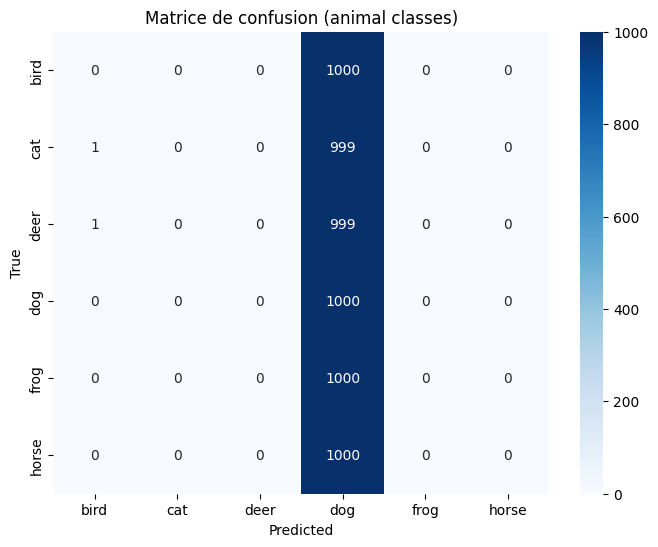

              precision    recall  f1-score   support

        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.17      1.00      0.29      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000

    accuracy                           0.17      6000
   macro avg       0.03      0.17      0.05      6000
weighted avg       0.03      0.17      0.05      6000



c:\Users\QWERTY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\QWERTY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\QWERTY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [56]:
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Filtrer le testset pour ne garder que les classes_animaux
indices_test_animaux = [
    i for i, (_, label) in enumerate(testset)
    if label_to_class[label] in classes_animaux
]
test_animaux = Subset(testset, indices_test_animaux)

# DataLoader sur ce sous-ensemble
test_loader = DataLoader(test_animaux, batch_size=64, shuffle=False)

# Évaluation
cnn_model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = cnn_model(imgs)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds, labels=[ 
    i for i, name in enumerate(testset.classes) 
    if name in classes_animaux 
])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=classes_animaux,
            yticklabels=classes_animaux,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matrice de confusion (animal classes)")
plt.show()

# Rapport de classification
print(classification_report(
    all_labels,
    all_preds,
    labels=[ 
        i for i, name in enumerate(testset.classes) 
        if name in classes_animaux 
    ],
    target_names=classes_animaux
))

In [57]:
from torch.utils.data import Dataset

# Dataset restreint aux classes_animaux, avec remapping label→0..5
class AnimalDataset(Dataset):
    def __init__(self, base_ds, classes, label_to_class):
        self.base    = base_ds
        self.indices = [i for i, (_, lbl) in enumerate(base_ds)
                        if label_to_class[lbl] in classes]
        self.cls2idx = {c: idx for idx, c in enumerate(classes)}
        self.lbl2cls = label_to_class

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, i):
        img, lbl = self.base[self.indices[i]]
        new_lbl  = self.cls2idx[self.lbl2cls[lbl]]
        return img, new_lbl

# Instanciation des datasets "animaux"  
train_animals = AnimalDataset(trainset, classes_animaux, label_to_class)
test_animals  = AnimalDataset(testset,  classes_animaux, label_to_class)

In [58]:
import torch.optim as optim
from torch.utils.data import random_split, DataLoader

# Split train_animals en train/val
val_ratio = 0.1
val_size  = int(val_ratio * len(train_animals))
train_size= len(train_animals) - val_size
train_split, val_split = random_split(train_animals, [train_size, val_size])

train_loader = DataLoader(train_split, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_split,   batch_size=64, shuffle=False)

# Et pour l’évaluation
test_loader  = DataLoader(test_animals, batch_size=64, shuffle=False)
# 2. Critère et optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-4) # Modifiez cette valeur (initialement 1e-3)

# Early stopping
patience = 3
best_val_loss = float('inf')
no_improve = 0

# 3. Boucle d’entraînement avec early stopping
num_epochs = 20
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

for epoch in range(1, num_epochs+1):
    # --- train ---
    cnn_model.train()
    running_loss, correct, total = 0.0, 0, 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(dim=1)
        correct   += (preds == labels).sum().item()
        total     += labels.size(0)
    train_loss = running_loss / total
    train_acc  = correct / total

    # --- validation ---
    cnn_model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = cnn_model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * imgs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total   += labels.size(0)
    val_loss /= total
    val_acc  = correct / total

    # stocker
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f"Epoch {epoch}/{num_epochs}  "
          f"Train loss={train_loss:.4f} acc={train_acc:.4f}  "
          f"Val loss={val_loss:.4f} acc={val_acc:.4f}")

    # check early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"▶ Early stopping à l’epoch {epoch} (pas d’amélioration depuis {patience} itérations)")
            break

Epoch 1/20  Train loss=1.3357 acc=0.4874  Val loss=1.1325 acc=0.5800
Epoch 2/20  Train loss=1.0634 acc=0.6087  Val loss=0.9986 acc=0.6270
Epoch 2/20  Train loss=1.0634 acc=0.6087  Val loss=0.9986 acc=0.6270
Epoch 3/20  Train loss=0.9356 acc=0.6593  Val loss=0.9225 acc=0.6590
Epoch 3/20  Train loss=0.9356 acc=0.6593  Val loss=0.9225 acc=0.6590
Epoch 4/20  Train loss=0.8394 acc=0.7011  Val loss=0.9259 acc=0.6537
Epoch 4/20  Train loss=0.8394 acc=0.7011  Val loss=0.9259 acc=0.6537
Epoch 5/20  Train loss=0.7607 acc=0.7301  Val loss=0.8943 acc=0.6617
Epoch 5/20  Train loss=0.7607 acc=0.7301  Val loss=0.8943 acc=0.6617
Epoch 6/20  Train loss=0.6920 acc=0.7576  Val loss=0.9050 acc=0.6630
Epoch 6/20  Train loss=0.6920 acc=0.7576  Val loss=0.9050 acc=0.6630
Epoch 7/20  Train loss=0.6283 acc=0.7837  Val loss=0.8947 acc=0.6697
Epoch 7/20  Train loss=0.6283 acc=0.7837  Val loss=0.8947 acc=0.6697
Epoch 8/20  Train loss=0.5714 acc=0.8064  Val loss=0.8746 acc=0.6763
Epoch 8/20  Train loss=0.5714 acc=

Courbes de loss et accuracy

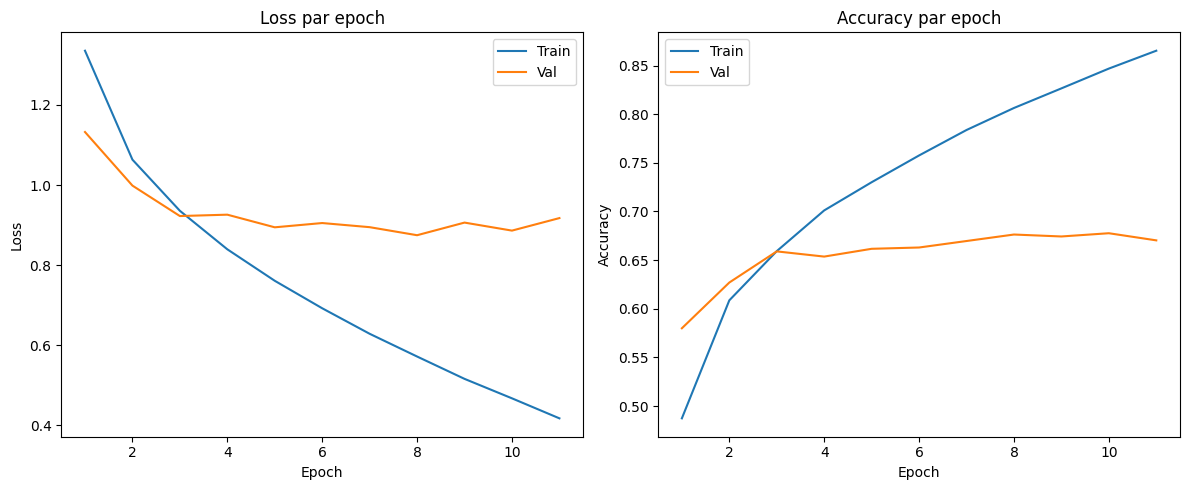

In [60]:
# Tracé des courbes
epochs = range(1, len(history['train_loss']) + 1) # Modifié ici

plt.figure(figsize=(12,5))
# Loss
plt.subplot(1,2,1)
plt.plot(epochs, history['train_loss'], label='Train')
plt.plot(epochs, history['val_loss'],   label='Val')
plt.title('Loss par epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, history['train_acc'], label='Train')
plt.plot(epochs, history['val_acc'],   label='Val')
plt.title('Accuracy par epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()